---
* Usecase

---

---
* Medical Imaging: In medical imaging (e.g., MRI scans or CT scans), circular overlapping datasets may arise when trying to distinguish between different types of tissues or objects that have circular shapes (like tumors, blood vessels, etc.), and the boundaries between them might overlap or be non-linear.

* Physics Simulations:
In physics, when simulating systems with circular motion (e.g., rotating objects, or orbits), a circular overlapping dataset might be used to model and classify different types of interactions based on position, velocity, and other features. For example, distinguishing between objects that have circular or spiral trajectories.
Pattern Recognition:

* In pattern recognition tasks where the objects of interest have circular shapes (e.g., recognizing different types of wheels, round shapes, or patterns that have circular symmetry), the dataset might be circular and overlapping due to noise or overlapping features.


* Robotics and Object Tracking:In robotics, tracking circular objects (such as wheels, rotating parts, or any round object) in a scene where these objects overlap can lead to a circular overlapping dataset. For example, distinguishing between different robotic parts based on their rotational motion might involve circular or spiral datasets.

* Geospatial Data Analysis: In geospatial data analysis, when modeling spatial interactions, circular overlapping datasets might occur when trying to classify different regions or objects on a map (e.g., urban areas overlapping with parkland or lakes). The relationship between regions may not always be linearly separable, requiring non-linear models like SVM with RBF.

---

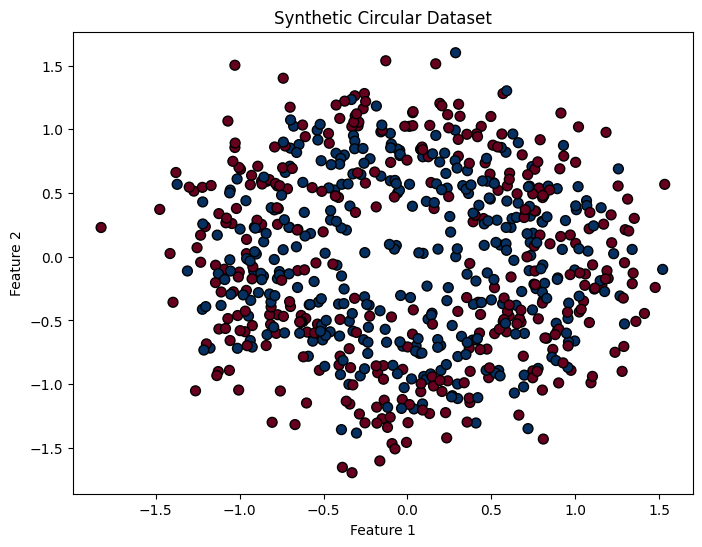

In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# Generate a synthetic circular dataset
X, y = make_circles(n_samples=1000, noise=0.3, factor=0.8, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Plot the dataset with red and blue colors
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolors='k', s=50)
plt.title("Synthetic Circular Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


---
### Linear Kernel

#### Mathematical Equation:
The linear kernel is the simplest kernel, represented as:

$$
K(x, x') = x^T x' + c
$$

Where:
- \( x \) and \( x' \) are the input vectors.
- \( c \) is the bias term or constant, which allows the kernel function to model data that may not pass through the origin.


#### Characteristics:
- A linear kernel implies that the decision boundary is a straight line (or hyperplane in higher dimensions).
- It is computationally efficient and easy to interpret.
- It works well when the data is linearly separable, i.e., when there is a clear linear boundary between the classes.

#### Use Case (Geometry of Dataset):
- **Best Suited For**: A linear kernel works best when the dataset is linearly separable or nearly linearly separable. In the case of circular overlapping datasets, it may fail to perform well as the classes are non-linearly separable.
- **Geometry of Dataset**: A linear kernel will not be effective for datasets like circular overlapping ones where the decision boundary is inherently non-linear.

#### Performance:
- **Pros**:
  - Fast and efficient for linearly separable data.
  - Less computationally expensive.
- **Cons**:
  - Struggles with complex, non-linear data like circular overlapping datasets.
  - May have poor performance on datasets with complex class distributions.


---

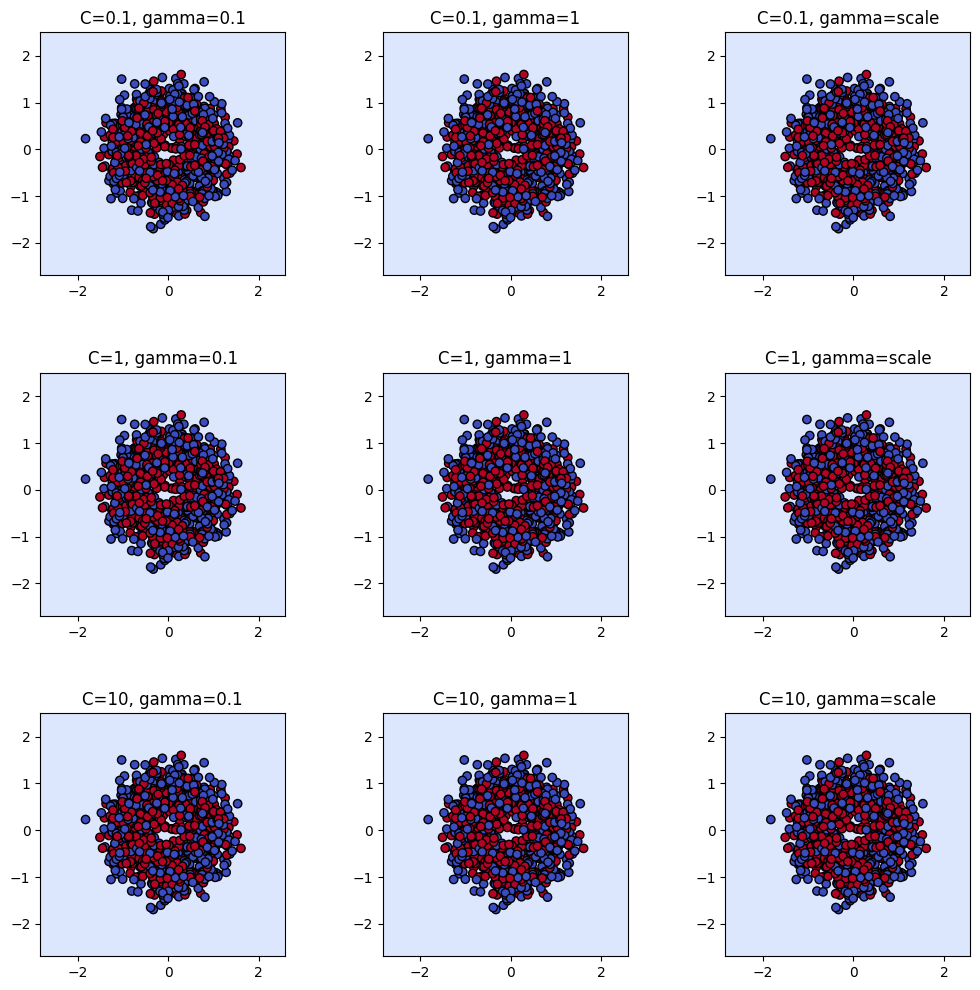

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Generate a synthetic circular dataset
X, y = make_circles(n_samples=1000, noise=0.3, factor=0.8, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)

# Try different C and gamma values
C_values = [0.1, 1, 10]
gamma_values = [0.1, 1, 'scale']

# Create subplots for all combinations of C and gamma
fig, axes = plt.subplots(len(C_values), len(gamma_values), figsize=(12, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):
        model = SVC(kernel='linear', C=C, gamma=gamma)
        model.fit(X_train, y_train)
        ax = axes[i, j]
        plot_decision_boundaries(X, y, model, ax)
        ax.set_title(f"C={C}, gamma={gamma}")

plt.show()


---

### Sigmoid Kernel

#### Mathematical Equation:
The sigmoid kernel is given by:

$$
K(x, x') = \tanh(\alpha x^T x' + c)
$$

Where:
- \( x \) and \( x' \) are the input vectors.
- \(\alpha \) is a scaling factor.
- \( c \) is the bias term or constant, which allows the kernel function to model data that may not pass through the origin.

#### Characteristics:
- The sigmoid kernel mimics the behavior of a neural network activation function, such as the tanh function.
- It is less commonly used in SVMs compared to the other kernels (RBF, polynomial).
- It maps the data into a higher-dimensional space, but the resulting decision boundaries are typically more complex and non-linear.

#### Use Case (Geometry of Dataset):
- **Best Suited For**: The sigmoid kernel can be useful for datasets where the classes are highly complex, though it is not as effective as the RBF kernel for circular overlapping datasets. It may be suitable for cases where the decision boundary resembles the shape of an activation function (like sigmoid).
- **Geometry of Dataset**: The sigmoid kernel’s decision boundary can capture some non-linear shapes, but it might not perform as well on circular overlapping datasets compared to RBF.

#### Performance:
- **Pros**:
  - Can handle non-linear decision boundaries.
  - Potentially useful for specific datasets with certain activation-like boundaries.
- **Cons**:
  - Generally, the RBF kernel outperforms the sigmoid kernel on circular overlapping datasets.
  - Tuning the parameters can be tricky, and the kernel might not provide superior performance on complex non-linear datasets.


---

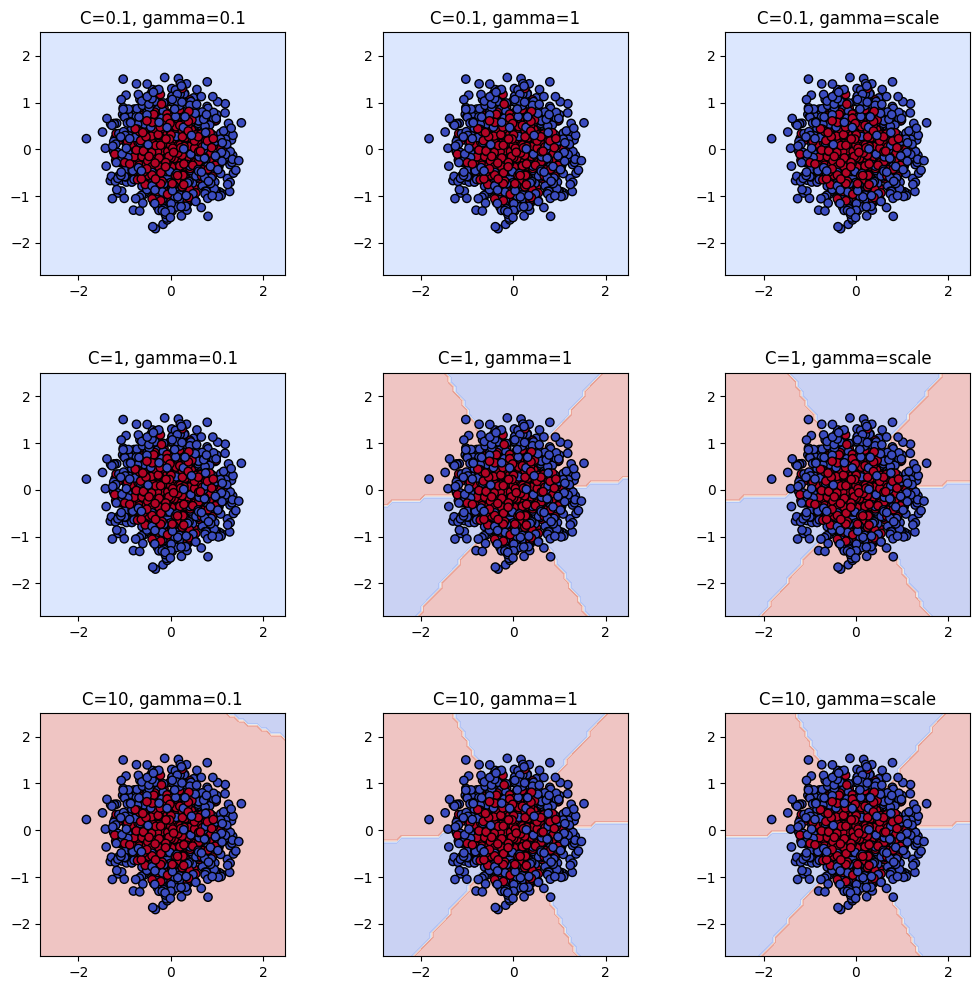

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Generate a circular overlapping dataset
X, y = make_circles(n_samples=1000, noise=0.3, factor=0.5, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)

# Try different C and gamma values
C_values = [0.1, 1, 10]
gamma_values = [0.1, 1, 'scale']

# Create subplots for all combinations of C and gamma
fig, axes = plt.subplots(len(C_values), len(gamma_values), figsize=(12, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):
        model = SVC(kernel='sigmoid', C=C, gamma=gamma)
        model.fit(X_train, y_train)
        ax = axes[i, j]
        plot_decision_boundaries(X, y, model, ax)
        ax.set_title(f"C={C}, gamma={gamma}")

plt.show()


---
### Polynomial Kernel

#### Mathematical Equation:
The polynomial kernel is given by:

$$
K(x, x') = (x^T x' + c)^d
$$

Where:
- \( x \) and \( x' \) are the input vectors.
- \( c \) is the bias term or constant, which allows the kernel function to model data that may not pass through the origin.
- \( d \) is the degree of the polynomial.


#### Characteristics:
- The polynomial kernel maps the input data into a higher-dimensional space.
- The decision boundary is a polynomial curve, which allows more flexibility compared to the linear kernel.
- The degree \( d \) controls the complexity of the decision boundary. Higher degrees create more complex decision boundaries.

#### Use Case (Geometry of Dataset):
- **Best Suited For**: The polynomial kernel is suitable for datasets with curved or polynomial-like decision boundaries. For a circular overlapping dataset, a polynomial kernel can create more complex decision boundaries, which may work well in this scenario.
- **Geometry of Dataset**: A polynomial kernel can effectively handle circular overlapping datasets by allowing for decision boundaries that are not linear but curved, which fits the geometry of the dataset.

#### Performance:
- **Pros**:
  - Works better than a linear kernel for non-linear data.
  - Allows flexible decision boundaries based on the degree of the polynomial.
- **Cons**:
  - Higher-degree polynomials can lead to overfitting, especially in noisy datasets.
  - Computationally more expensive than the linear kernel.


---

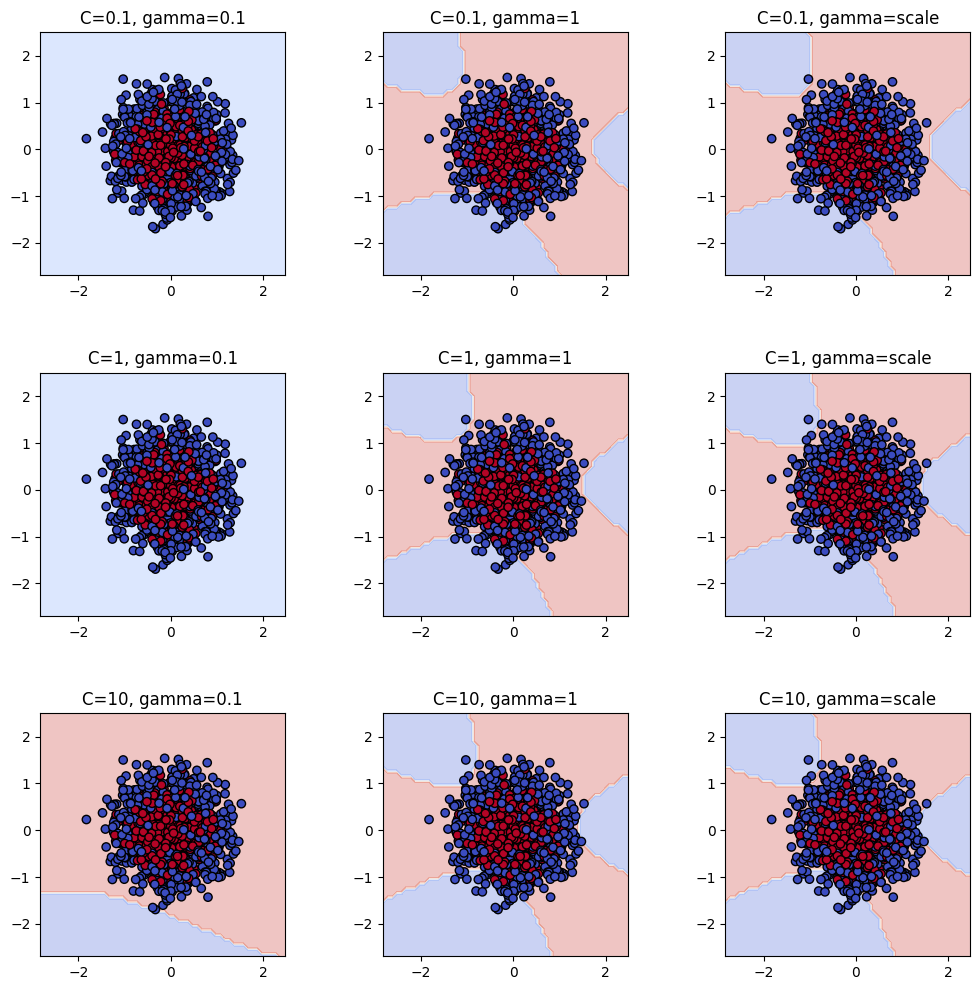

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Generate a circular overlapping dataset
X, y = make_circles(n_samples=1000, noise=0.3, factor=0.5, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)

# Try different C and gamma values
C_values = [0.1, 1, 10]
gamma_values = [0.1, 1, 'scale']

# Create subplots for all combinations of C and gamma
fig, axes = plt.subplots(len(C_values), len(gamma_values), figsize=(12, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):
        model = SVC(kernel='poly', C=C, gamma=gamma)
        model.fit(X_train, y_train)
        ax = axes[i, j]
        plot_decision_boundaries(X, y, model, ax)
        ax.set_title(f"C={C}, gamma={gamma}")

plt.show()


---
### Radial Basis Function (RBF) Kernel

#### Mathematical Equation:
The RBF kernel is given by:

$$
K(x, x') = \exp\left(-\frac{\|x - x'\|^2}{2\sigma^2}\right)
$$

Where:
- \( x \) and \( x' \) are the input vectors.
- \( \|x - x'\|^2 \) is the squared Euclidean distance between the vectors \( x \) and \( x' \).
- \( \sigma \) (or \( \gamma \)) is a parameter that controls the spread of the kernel.


#### Characteristics:
- The RBF kernel is highly flexible and capable of modeling complex, non-linear decision boundaries.
- It transforms the data into a higher-dimensional space, where it can separate the data with a non-linear boundary.
- The kernel's parameter \( \sigma \) (or \( \gamma \)) controls the width of the Gaussian function, impacting the model’s flexibility.

#### Use Case (Geometry of Dataset):
- **Best Suited For**: The RBF kernel excels at handling circular overlapping datasets. It can model the complex non-linear relationships inherent in such data.
- **Geometry of Dataset**: The RBF kernel can create circular decision boundaries, making it well-suited for datasets where the classes overlap in a circular or spherical manner, which is the case in circular overlapping datasets.

#### Performance:
- **Pros**:
  - Excellent performance on non-linear datasets like circular overlapping datasets.
  - Highly flexible and can adapt to various types of decision boundaries.
- **Cons**:
  - Requires careful tuning of the \( \gamma \) parameter to avoid overfitting or underfitting.
  - Computationally more expensive than linear and polynomial kernels.


---

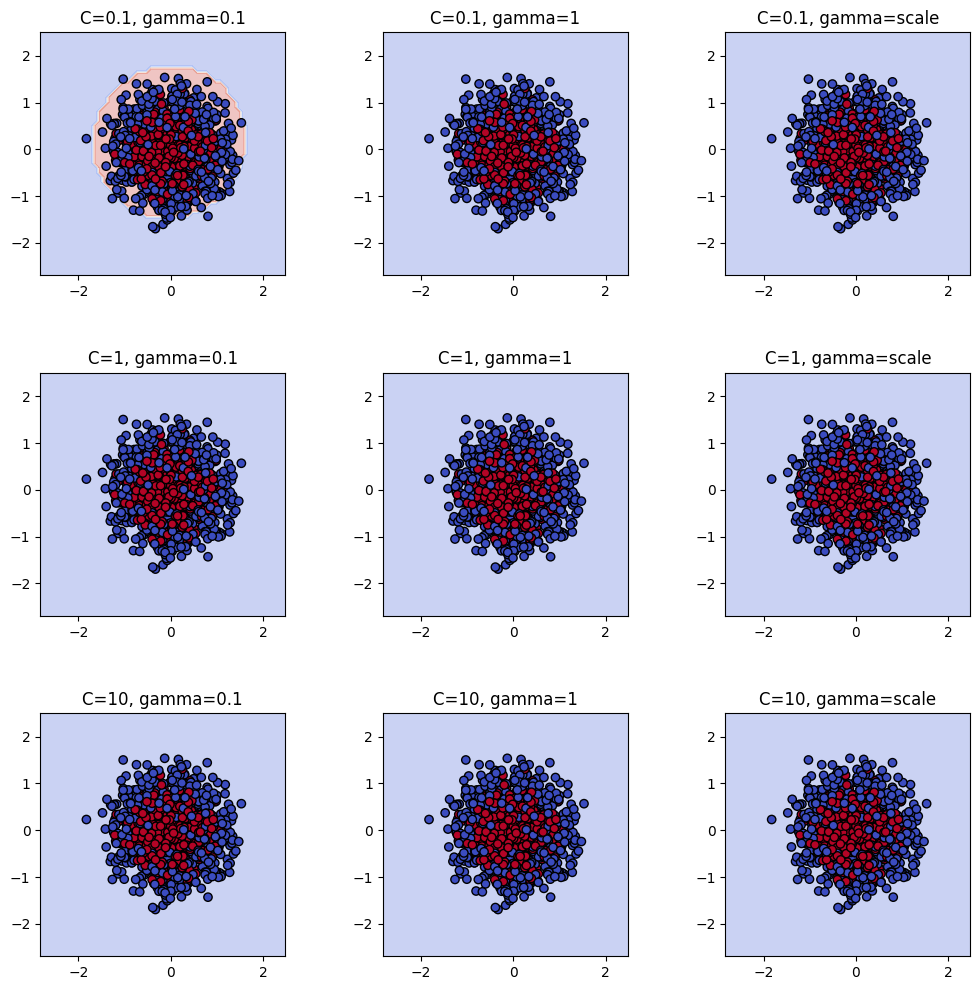

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Generate a circular overlapping dataset
X, y = make_circles(n_samples=1000, noise=0.3, factor=0.5, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)

# Try different C and gamma values
C_values = [0.1, 1, 10]
gamma_values = [0.1, 1, 'scale']

# Create subplots for all combinations of C and gamma
fig, axes = plt.subplots(len(C_values), len(gamma_values), figsize=(12, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):
        model = SVC(kernel='rbf', C=C, gamma=gamma)
        model.fit(X_train, y_train)
        ax = axes[i, j]
        plot_decision_boundaries(X, y, model, ax)
        ax.set_title(f"C={C}, gamma={gamma}")

plt.show()
